# Agglomerative clustering

Agglomerative clustering is a hierarchical clustering method that builds nested clusters by repeatedly merging or splitting them. It starts with each data point as its own cluster and merges the closest pairs of clusters iteratively.

In this notebook, Agglomerative Clustering will be applied to two datasets:
- **Wine dataset**: A real-world, high-dimensional dataset with chemical properties of wines.
- **Two Moons dataset**: A synthetic, 2D dataset that exhibits non-linearly separable clusters.

## Required Libraries

In [ ]:
!pip install ace_tools


In [ ]:
# Required Libraries
import pandas as pd
from sklearn.datasets import load_wine, make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage


## Data Loading and Processing

   - **Wine Dataset**:
     - This dataset contains 178 samples with 13 features, representing various chemical properties of wines. The data was standardized using `StandardScaler` to ensure that all features had equal weight during clustering (which is important when distances between points are calculated).
   - **Two Moons Dataset**:
     - This dataset is a synthetic 2D dataset with two interlocking crescent-shaped clusters. It was also standardized using `StandardScaler` to scale the features to a mean of 0 and a standard deviation of 1.

In [ ]:
# The Wine dataset and Two Moons dataset are loaded and scaled for clustering.

# Load Wine Dataset
wine_data = load_wine()
X_wine = wine_data.data
y_wine = wine_data.target

# Load Two Moons Dataset
X_moons, y_moons = make_moons(n_samples=500, noise=0.1)

# Scale Data
scaler = StandardScaler()
X_wine_scaled = scaler.fit_transform(X_wine)
X_moons_scaled = scaler.fit_transform(X_moons)


## Visualization of True Labels

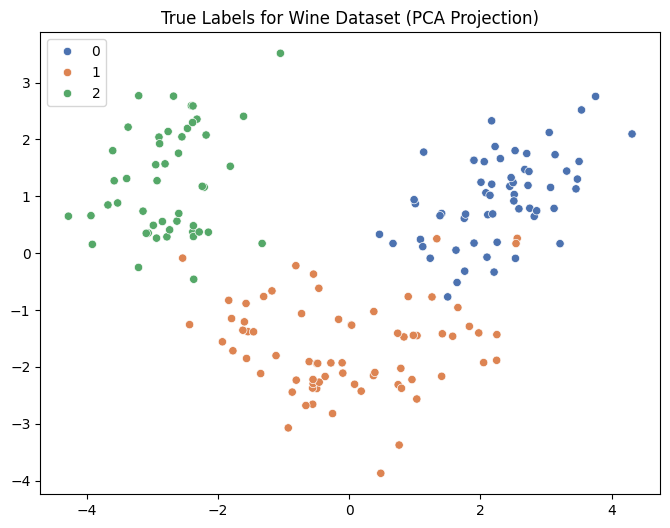

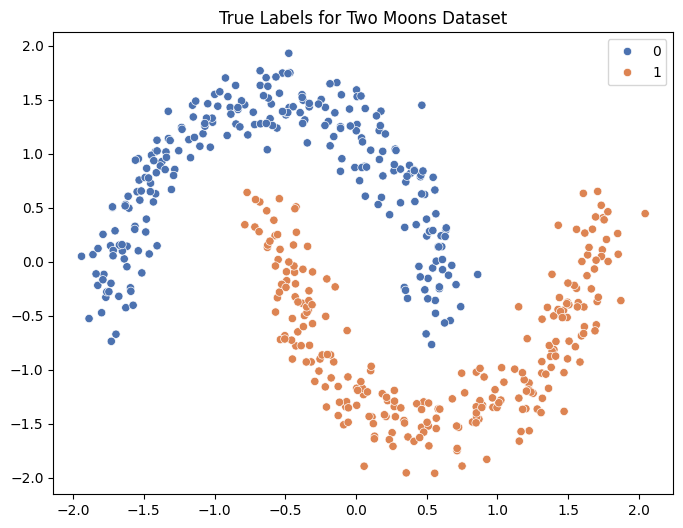

In [ ]:
# PCA for dimensionality reduction (Wine dataset)
pca = PCA(n_components=2)
wine_pca = pca.fit_transform(X_wine_scaled)

# Visualization of True Labels for Wine Dataset
plt.figure(figsize=(8,6))
sns.scatterplot(x=wine_pca[:,0], y=wine_pca[:,1], hue=y_wine, palette='deep', legend='full')
plt.title("True Labels for Wine Dataset (PCA Projection)")
plt.show()

# Visualization of True Labels for Two Moons Dataset
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_moons_scaled[:,0], y=X_moons_scaled[:,1], hue=y_moons, palette='deep', legend='full')
plt.title("True Labels for Two Moons Dataset")
plt.show()


## Estimating the Number of Clusters for Wine and Two Moons Datasets (Exploratory Analysis)

In [ ]:
# Silhouette Analysis for a range of cluster numbers
def silhouette_analysis(X, cluster_range):
    silhouette_scores = []

    for n_clusters in cluster_range:
        clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
        cluster_labels = clustering.fit_predict(X)
        silhouette_avg = silhouette_score(X, cluster_labels)
        silhouette_scores.append(silhouette_avg)
        print(f"Number of clusters: {n_clusters}, Silhouette Score: {silhouette_avg}")

    # Plot the Silhouette scores for each number of clusters
    plt.figure(figsize=(10, 6))
    plt.plot(cluster_range, silhouette_scores, marker='o')
    plt.title("Silhouette Analysis for Optimal Number of Clusters")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Silhouette Score")
    plt.show()

Silhouette Analysis for Wine Dataset
Number of clusters: 2, Silhouette Score: 0.2670131771272231
Number of clusters: 3, Silhouette Score: 0.2774439826952266
Number of clusters: 4, Silhouette Score: 0.22583665933475802
Number of clusters: 5, Silhouette Score: 0.18674235566758707
Number of clusters: 6, Silhouette Score: 0.17966642854438503
Number of clusters: 7, Silhouette Score: 0.1868534256022694
Number of clusters: 8, Silhouette Score: 0.18834697102837822
Number of clusters: 9, Silhouette Score: 0.1917169293227209
Number of clusters: 10, Silhouette Score: 0.19856750165505588


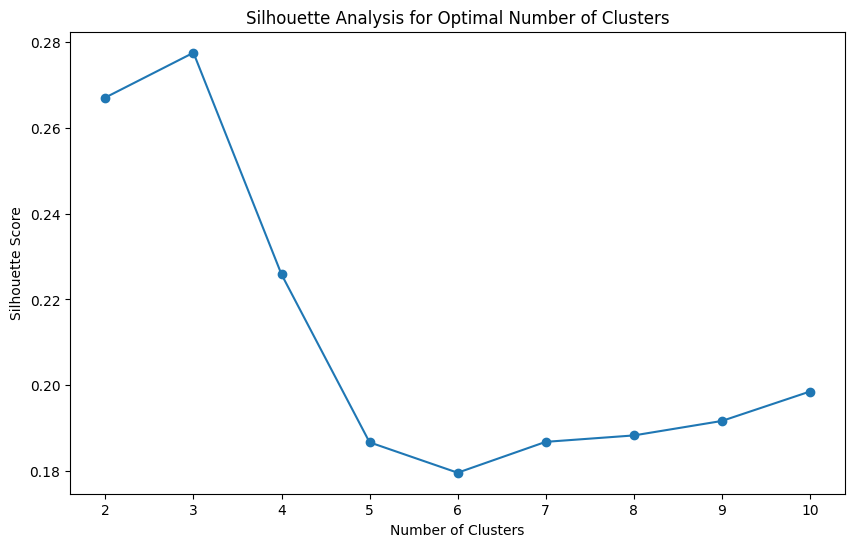

In [ ]:
# Silhouette Analysis for Wine dataset
cluster_range = range(2, 11)
print("Silhouette Analysis for Wine Dataset")
silhouette_analysis(X_wine_scaled, cluster_range)

The Wine dataset is known to have three distinct clusters corresponding to different wine types. In the silhouette analysis, the highest silhouette score occurs for three clusters, which is consistent with the expected number of clusters for this dataset. This indicates that the silhouette score correctly identifies the optimal number of clusters in this case.

Silhouette Analysis for Two Moons Dataset
Number of clusters: 2, Silhouette Score: 0.4458636445422502
Number of clusters: 3, Silhouette Score: 0.3603108855936278
Number of clusters: 4, Silhouette Score: 0.3771968583098909
Number of clusters: 5, Silhouette Score: 0.4105913185724019
Number of clusters: 6, Silhouette Score: 0.4286228032790947
Number of clusters: 7, Silhouette Score: 0.406789181295512
Number of clusters: 8, Silhouette Score: 0.447701068276243
Number of clusters: 9, Silhouette Score: 0.43707730397967204
Number of clusters: 10, Silhouette Score: 0.42533254854098884


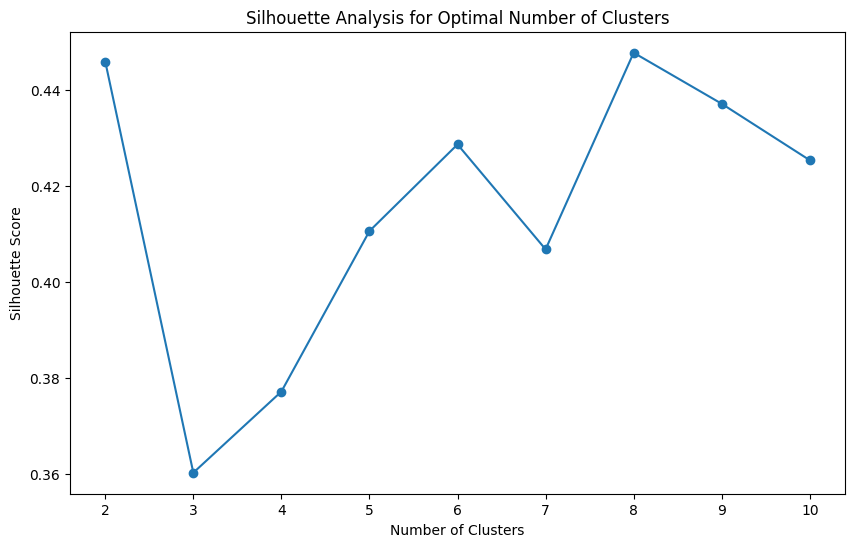

In [ ]:
# Silhouette Analysis for Two Moons dataset
print("Silhouette Analysis for Two Moons Dataset")
silhouette_analysis(X_moons_scaled, cluster_range)

Despite the fact that the Two Moons dataset has only two actual clusters, the silhouette analysis indicates a higher score when using seven clusters. This result highlights a limitation of the silhouette score when applied to complex, non-spherical clusters, like those in the Two Moons dataset. The silhouette score assumes that clusters are convex and roughly spherical, which is not true for the Two Moons data. In such cases, the algorithm may misinterpret the structure and suggest more clusters, as it tries to fit the data into compact shapes. Therefore, relying solely on the silhouette score for datasets with non-linear structures may lead to an inaccurate estimate of the optimal number of clusters.

## Parameter Testing
- linkage: Determines how clusters are merged:
  - 'ward' (minimizes the variance of merged clusters, requires Euclidean distance)
  - 'complete' (maximizes the distance between clusters)
  - 'average' (minimizes the average of distances)
  - 'single' (minimizes the minimum distance between points)
- affinity: The distance metric used for calculating distances between points:
  - 'euclidean'
  - 'manhattan'
  - 'cosine' (for linkage methods other than 'ward')


### Wine Dataset

In [ ]:
# Define parameter ranges
linkage_methods = ['ward', 'complete', 'average', 'single']
metric_options = ['euclidean', 'manhattan', 'cosine']

# Store results in a dictionary for analysis and store cluster labels for plotting
results_wine = []
cluster_labels_list = []  # Store cluster labels for each combination

# Fixed number of clusters
n_clusters = 3

# Loop over different linkage and metric parameters
for linkage in linkage_methods:
    for metric in metric_options:
        # Ward linkage only works with Euclidean distance, so skip other affinity metrics
        if linkage == 'ward' and metric != 'euclidean':
            continue
        try:
            agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage, metric=metric)
            cluster_labels = agg_clustering.fit_predict(X_wine_scaled)

            # Calculate the metrics
            silhouette = silhouette_score(X_wine_scaled, cluster_labels)
            davies_bouldin = davies_bouldin_score(X_wine_scaled, cluster_labels)
            calinski_harabasz = calinski_harabasz_score(X_wine_scaled, cluster_labels)
            adjusted_rand = adjusted_rand_score(y_wine, cluster_labels)

            # Store results
            result = {
                'linkage': linkage,
                'metric': metric,
                'silhouette_score': silhouette,
                'davies_bouldin_score': davies_bouldin,
                'calinski_harabasz_score': calinski_harabasz,
                'adjusted_rand_score': adjusted_rand
            }
            results_wine.append(result)
            cluster_labels_list.append(cluster_labels)  # Store cluster labels for this combination
        except Exception as e:
            print(f"Error for linkage='{linkage}', metric='{metric}': {e}")

# Convert results to DataFrame and display
results_df_wine = pd.DataFrame(results_wine)
# results_df_wine


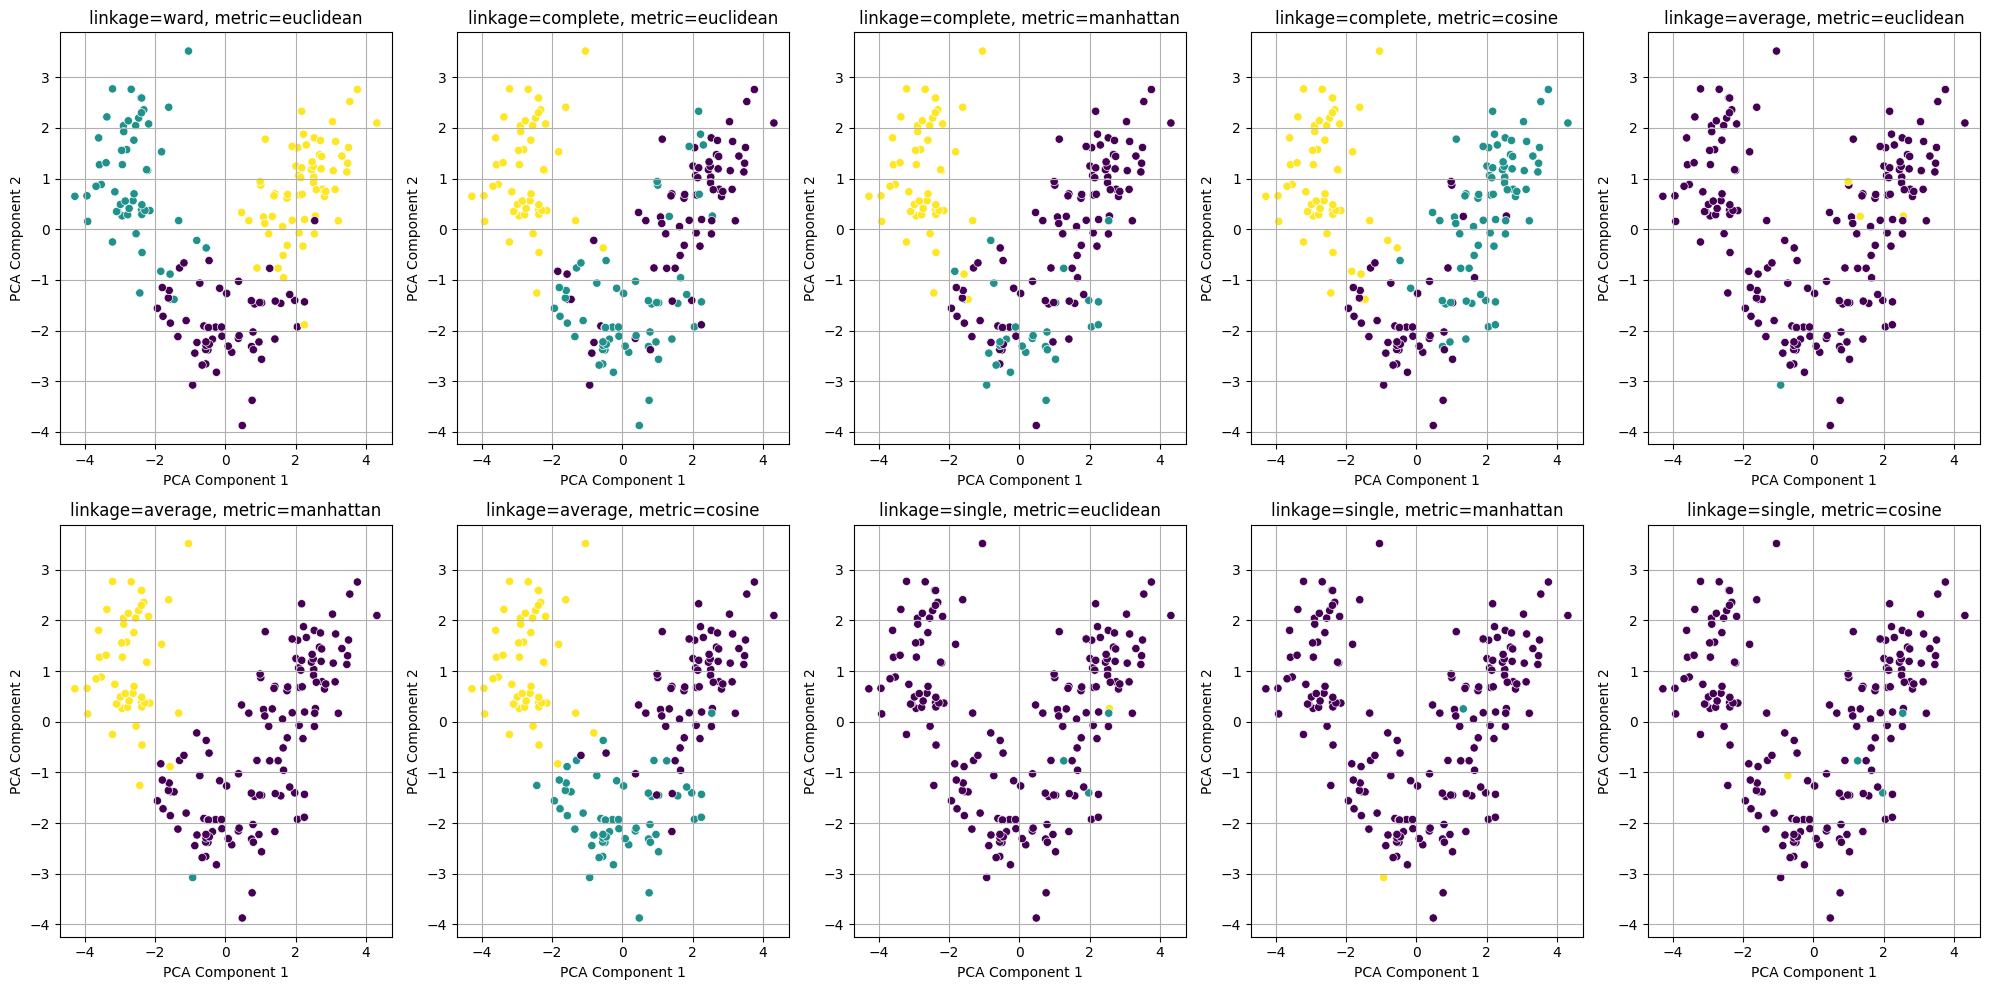

In [ ]:
# Perform PCA for dimensionality reduction to 2D
pca_wine = PCA(n_components=2)
X_wine_pca = pca_wine.fit_transform(X_wine_scaled)

# Adjust subplots to have 2 rows and 5 columns to fit 10 combinations
fig, axes = plt.subplots(2, 5, figsize=(20, 10))  # Adjusted to fit 10 combinations (2 rows, 5 columns)

# Loop through the plots and use actual number of combinations (10)
for i, ax in enumerate(axes.flat):
    params = f"linkage={results_df_wine['linkage'][i]}, metric={results_df_wine['metric'][i]}"

    # Plot the PCA-transformed data with actual clustering result from the Agglomerative Clustering
    sns.scatterplot(
        x=X_wine_pca[:, 0], y=X_wine_pca[:, 1],
        hue=cluster_labels_list[i],  # Use actual cluster labels
        palette='viridis', ax=ax, legend=None
    )
    ax.set_title(params)
    ax.set_xlabel("PCA Component 1")
    ax.set_ylabel("PCA Component 2")
    ax.grid(True)

plt.tight_layout()
plt.show()


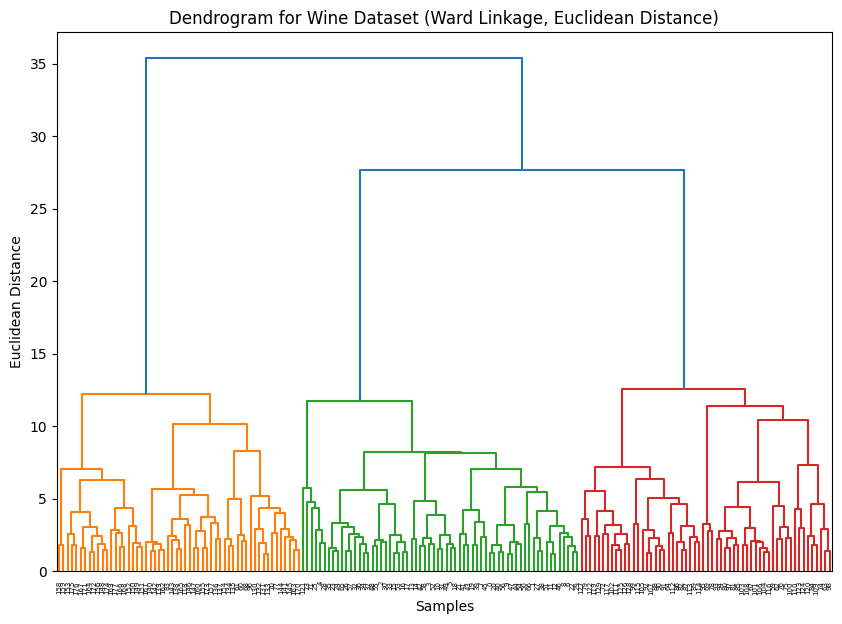

In [ ]:
# Generate linkage matrix for Wine dataset using ward linkage and euclidean distance
from scipy.cluster.hierarchy import linkage

Z_wine = linkage(X_wine_scaled, method='ward')

# Plot the dendrogram for Wine dataset
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Wine Dataset (Ward Linkage, Euclidean Distance)")
dendrogram(Z_wine)
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()


### Two Moons Dataset

In [ ]:
# Helper function to calculate centroid of a cluster
def calculate_centroid(cluster_points):
    return np.mean(cluster_points, axis=0)

# Helper function to calculate median of a cluster
def calculate_median(cluster_points):
    return np.median(cluster_points, axis=0)

# Custom Agglomerative Clustering using centroid/median linkage
def custom_agglomerative_clustering(X, n_clusters=2, linkage="centroid"):
    # Initialize each point as its own cluster
    clusters = {i: [X[i]] for i in range(len(X))}

    # Function to calculate the distance between two clusters
    def cluster_distance(cluster1, cluster2, linkage_method):
        if linkage_method == "centroid":
            centroid1 = calculate_centroid(cluster1)
            centroid2 = calculate_centroid(cluster2)
            return np.linalg.norm(centroid1 - centroid2)  # Euclidean distance between centroids
        elif linkage_method == "median":
            median1 = calculate_median(cluster1)
            median2 = calculate_median(cluster2)
            return np.linalg.norm(median1 - median2)  # Euclidean distance between medians

    # Repeat until desired number of clusters is reached
    while len(clusters) > n_clusters:
        # Find the two closest clusters
        cluster_pairs = [(i, j) for i in clusters for j in clusters if i < j]
        closest_pair = min(cluster_pairs, key=lambda pair: cluster_distance(clusters[pair[0]], clusters[pair[1]], linkage))

        # Merge the two closest clusters
        i, j = closest_pair
        clusters[i].extend(clusters[j])  # Merge points from cluster j into cluster i
        del clusters[j]  # Remove cluster j

    # Assign cluster labels
    labels = np.zeros(len(X))
    for label, points in clusters.items():
        for point in points:
            point_index = np.where((X == point).all(axis=1))[0][0]
            labels[point_index] = label

    return labels

# Run the custom agglomerative clustering for centroid and median linkages
centroid_cluster_labels = custom_agglomerative_clustering(X_moons_scaled, n_clusters=2, linkage="centroid")
median_cluster_labels = custom_agglomerative_clustering(X_moons_scaled, n_clusters=2, linkage="median")

# List of labels for centroid and median linkages
cluster_labels_list = [centroid_cluster_labels, median_cluster_labels]

# Calculate performance metrics for centroid and median linkage
centroid_silhouette = silhouette_score(X_moons_scaled, centroid_cluster_labels)
centroid_davies_bouldin = davies_bouldin_score(X_moons_scaled, centroid_cluster_labels)
centroid_calinski_harabasz = calinski_harabasz_score(X_moons_scaled, centroid_cluster_labels)
centroid_adjusted_rand = adjusted_rand_score(y_moons, centroid_cluster_labels)

median_silhouette = silhouette_score(X_moons_scaled, median_cluster_labels)
median_davies_bouldin = davies_bouldin_score(X_moons_scaled, median_cluster_labels)
median_calinski_harabasz = calinski_harabasz_score(X_moons_scaled, median_cluster_labels)
median_adjusted_rand = adjusted_rand_score(y_moons, median_cluster_labels)



# Define parameter ranges (n_clusters is fixed to 2 for the Two Moons dataset)
linkage_methods = ['ward', 'complete', 'average', 'single']  # Only supported methods in sklearn
metric_options = ['euclidean', 'manhattan', 'cosine', 'chebyshev']

# Store results in a list for analysis and cluster labels for plotting
results_moons = []
cluster_labels_list_sklearn = []  # For sklearn-generated cluster labels

# Fixed number of clusters
n_clusters = 2

# Loop over different linkage and metric parameters
for linkage in linkage_methods:
    for metric in metric_options:
        # Ward linkage only works with Euclidean distance, so skip other metrics for Ward
        if linkage == 'ward' and metric != 'euclidean':
            continue
        try:
            # Create the clustering model
            agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage, metric=metric)

            # Fit the model and predict cluster labels
            cluster_labels = agg_clustering.fit_predict(X_moons_scaled)

            # Calculate performance metrics
            silhouette = silhouette_score(X_moons_scaled, cluster_labels)
            davies_bouldin = davies_bouldin_score(X_moons_scaled, cluster_labels)
            calinski_harabasz = calinski_harabasz_score(X_moons_scaled, cluster_labels)
            adjusted_rand = adjusted_rand_score(y_moons, cluster_labels)

            # Store results
            result = {
                'linkage': linkage,
                'metric': metric,
                'silhouette_score': silhouette,
                'davies_bouldin_score': davies_bouldin,
                'calinski_harabasz_score': calinski_harabasz,
                'adjusted_rand_score': adjusted_rand
            }
            results_moons.append(result)
            cluster_labels_list_sklearn.append(cluster_labels)  # Store cluster labels for this combination
        except Exception as e:
            print(f"Error for linkage='{linkage}', metric='{metric}': {e}")



In [ ]:
# Convert results to DataFrame and append centroid and median linkage results manually
results_df_moons = pd.DataFrame(results_moons)

# Use pd.concat instead of append, as append is deprecated
centroid_median_df = pd.DataFrame([
    {'linkage': 'centroid', 'metric': 'euclidean', 'silhouette_score': centroid_silhouette, 'davies_bouldin_score': centroid_davies_bouldin,
     'calinski_harabasz_score': centroid_calinski_harabasz, 'adjusted_rand_score': centroid_adjusted_rand},
    {'linkage': 'median', 'metric': 'euclidean', 'silhouette_score': median_silhouette, 'davies_bouldin_score': median_davies_bouldin,
     'calinski_harabasz_score': median_calinski_harabasz, 'adjusted_rand_score': median_adjusted_rand}
])

# Concatenate the original results with the centroid and median results
results_df_moons = pd.concat([results_df_moons, centroid_median_df], ignore_index=True)

# Combine all cluster labels (from sklearn and custom centroid/median) into one list
all_cluster_labels_list = cluster_labels_list_sklearn + cluster_labels_list

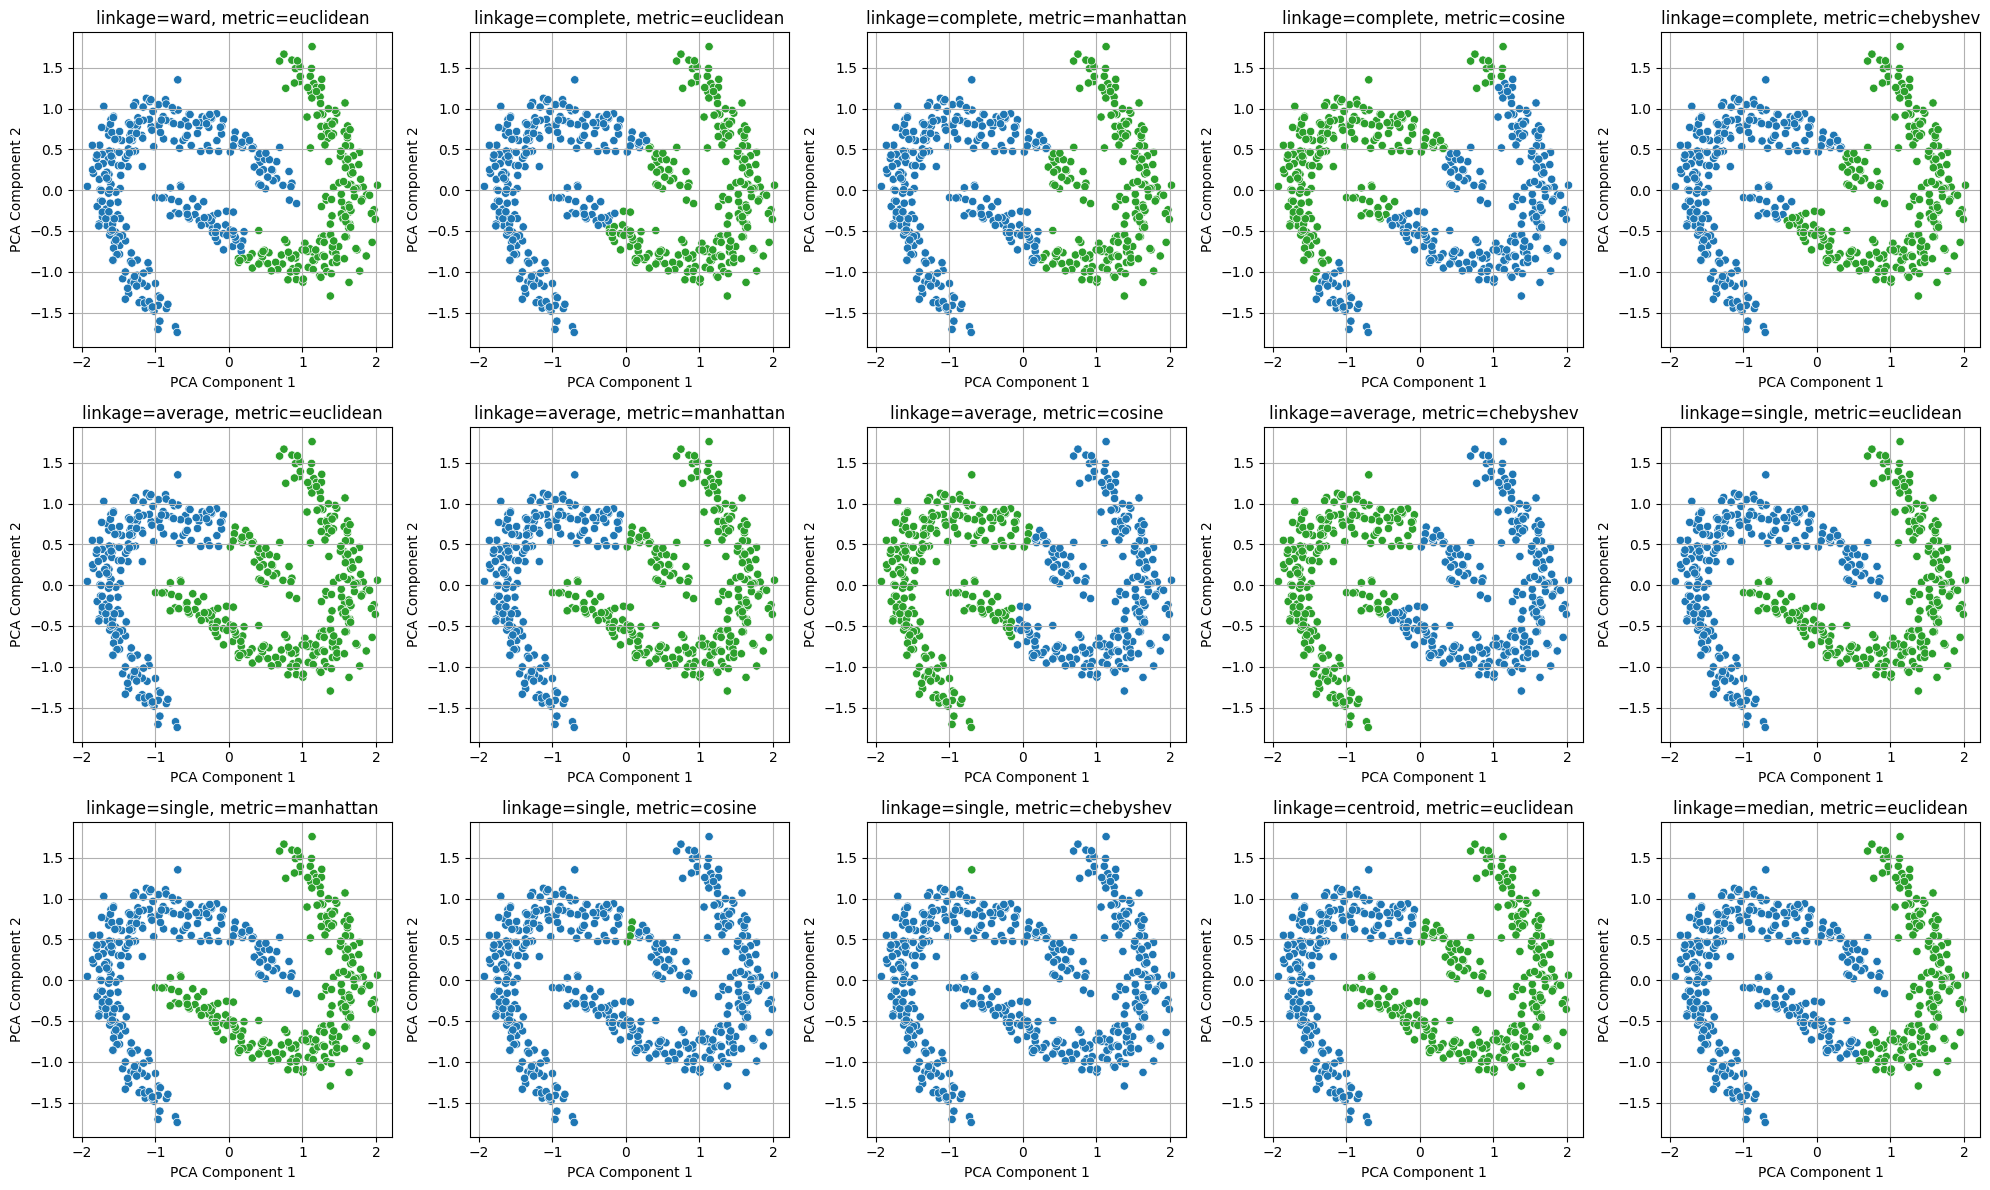

In [ ]:
# Perform PCA for dimensionality reduction to 2D
pca_moons = PCA(n_components=2)
X_moons_pca = pca_moons.fit_transform(X_moons_scaled)

# Define a uniform color palette for all plots (two clusters: 0 and 1)
uniform_palette = ['#1f77b4', '#2ca02c']  # Colors corresponding to the viridis palette for 2 clusters

# Adjust subplots to fit the number of combinations (13 sklearn + 2 custom)
fig, axes = plt.subplots(3, 5, figsize=(20, 12))  # Adjusted to fit 15 combinations (3 rows x 5 columns)

# Loop through the plots and use the actual number of combinations
for i, ax in enumerate(axes.flat):
    if i >= len(results_df_moons):
        ax.axis('off')  # Turn off unused subplots
        continue
    params = f"linkage={results_df_moons['linkage'][i]}, metric={results_df_moons['metric'][i]}"

    # Plot the PCA-transformed data with actual clustering result from Agglomerative Clustering
    sns.scatterplot(
        x=X_moons_pca[:, 0], y=X_moons_pca[:, 1],
        hue=all_cluster_labels_list[i],  # Use actual cluster labels
        palette=uniform_palette, ax=ax, legend=None  # Using the predefined palette
    )
    ax.set_title(params)
    ax.set_xlabel("PCA Component 1")
    ax.set_ylabel("PCA Component 2")
    ax.grid(True)

plt.tight_layout()
plt.show()


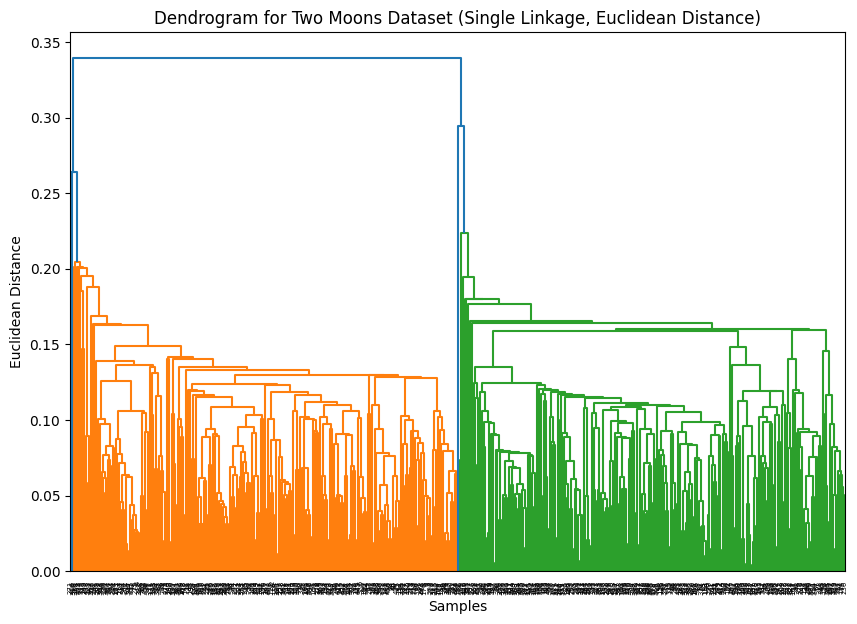

In [ ]:
# Generate linkage matrix for Two Moons dataset using single linkage and euclidean distance
from scipy.cluster.hierarchy import dendrogram, linkage  # Ensure correct import

Z_moons = linkage(X_moons_scaled, method='single')

# Plot the dendrogram for Two Moons dataset
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Two Moons Dataset (Single Linkage, Euclidean Distance)")
dendrogram(Z_moons)
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()

## Evaluation Metrics

1. Silhouette Score:

* Definition: Measures how similar a data point is to its own cluster compared to other clusters.
* Range: The score ranges from -1 to 1, where:
  * 1 indicates perfect clustering.
  * 0 means the data point is on or very near the decision boundary between two clusters.
  * Negative values indicate that the point has likely been assigned to the wrong cluster.
* Interpretation: Higher values are better, with a score close to 1 representing well-separated clusters.

<br>


2. Davies-Bouldin Index:

* Definition: Evaluates the clustering quality by looking at the ratio of intra-cluster distances to inter-cluster distances.
* Range: The score is positive, with:
  * 0 representing a perfect clustering scenario.
  * Higher values indicating poorer clustering.
* Interpretation: Lower values are better, as they signify more compact clusters that are farther apart from one another.

<br>


3. Calinski-Harabasz Index:

* Definition: Measures the ratio of the sum of between-cluster dispersion and within-cluster dispersion.
* Range: The score is positive, with:
  * Higher values indicating better clustering.
* Interpretation: A higher score reflects clusters that are compact and well-separated.


<br>


4. Adjusted Rand Index (ARI):

* Definition: Compares the predicted clusters with the true labels to measure how well the clustering aligns with the ground truth.
* Range: The score ranges from 0 to 1, where:
  * 1 means perfect agreement with the true labels.
  * 0 means that the clustering is equivalent to random assignment.
* Interpretation: Higher values are better, with a score of 1 indicating that the clustering matches the true labels exactly.

## Results

Here are the results obtained from applying Agglomerative Clustering to both datasets:

In [ ]:
# Calculate the best values for each column for the Wine dataset
best_silhouette_wine = results_df_wine['silhouette_score'].max()
best_davies_bouldin_wine = results_df_wine['davies_bouldin_score'].min()
best_calinski_harabasz_wine = results_df_wine['calinski_harabasz_score'].max()
best_ari_wine = results_df_wine['adjusted_rand_score'].max()

# Define a function to highlight only the best cells for Wine dataset
def highlight_best_cells_wine(s):
    return ['background-color: darkgreen' if (
                (col == 'silhouette_score' and s['silhouette_score'] == best_silhouette_wine) or
                (col == 'davies_bouldin_score' and s['davies_bouldin_score'] == best_davies_bouldin_wine) or
                (col == 'calinski_harabasz_score' and s['calinski_harabasz_score'] == best_calinski_harabasz_wine) or
                (col == 'adjusted_rand_score' and s['adjusted_rand_score'] == best_ari_wine)
            ) else '' for col in s.index]

# Apply the function to highlight only the best cells for Wine dataset
styled_df_wine = results_df_wine.style.apply(highlight_best_cells_wine, axis=1)

styled_df_wine

,linkage,metric,silhouette_score,davies_bouldin_score,calinski_harabasz_score,adjusted_rand_score
0,ward,euclidean,0.277444,1.418592,67.647468,0.789933
1,complete,euclidean,0.203787,1.896096,48.989830,0.577144
2,complete,manhattan,0.189924,1.874717,44.032777,0.485538
3,complete,cosine,0.244259,1.548249,59.908031,0.597248
4,average,euclidean,0.157525,1.029890,4.031439,-0.005442
5,average,manhattan,0.251940,1.069956,34.845671,0.473049
6,average,cosine,0.264458,1.463375,64.262898,0.784706
7,single,euclidean,0.182738,0.910518,4.061665,-0.006814
8,single,manhattan,0.197952,0.584997,2.828435,-0.003819
9,single,cosine,-0.114282,1.253696,3.123793,-0.006814


In [ ]:
# Calculate the best values for each column for the Two Moons dataset
best_silhouette_moons = results_df_moons['silhouette_score'].max()
best_davies_bouldin_moons = results_df_moons['davies_bouldin_score'].min()
best_calinski_harabasz_moons = results_df_moons['calinski_harabasz_score'].max()
best_ari_moons = results_df_moons['adjusted_rand_score'].max()

# Define a function to highlight only the best cells for Two Moons dataset
def highlight_best_cells_moons(s):
    return ['background-color: darkgreen' if (
                (col == 'silhouette_score' and s['silhouette_score'] == best_silhouette_moons) or
                (col == 'davies_bouldin_score' and s['davies_bouldin_score'] == best_davies_bouldin_moons) or
                (col == 'calinski_harabasz_score' and s['calinski_harabasz_score'] == best_calinski_harabasz_moons) or
                (col == 'adjusted_rand_score' and s['adjusted_rand_score'] == best_ari_moons)
            ) else '' for col in s.index]

# Apply the function to highlight only the best cells for Two Moons dataset
styled_df_moons = results_df_moons.style.apply(highlight_best_cells_moons, axis=1)

styled_df_moons

,linkage,metric,silhouette_score,davies_bouldin_score,calinski_harabasz_score,adjusted_rand_score
0,ward,euclidean,0.445864,0.864544,544.380827,0.626548
1,complete,euclidean,0.481274,0.828016,646.976617,0.601377
2,complete,manhattan,0.480621,0.816688,646.071470,0.455902
3,complete,cosine,0.393906,1.027532,367.186727,0.393180
4,complete,chebyshev,0.470469,0.846072,616.596661,0.671742
5,average,euclidean,0.446091,0.880483,545.671500,0.705024
6,average,manhattan,0.446091,0.880483,545.671500,0.705024
7,average,cosine,0.489981,0.814034,674.195211,0.517433
8,average,chebyshev,0.483668,0.822318,649.677028,0.576757
9,single,euclidean,0.369464,1.055845,402.574405,1.000000
